In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('datasets - datasets.csv')
dataset

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,Wheat,10,400,30,15,0
1,Wheat,7,200,30,32,0
2,Wheat,9,300,21,28,0
3,Wheat,3,500,40,22,0
4,Wheat,2,700,23,34,0
...,...,...,...,...,...,...
496,Coffee,93,675,25,19,1
497,Coffee,95,210,23,17,0
498,Coffee,97,398,25,18,0
499,Coffee,99,678,24,18,1


In [4]:
dataset.columns

Index(['CropType', 'CropDays', 'SoilMoisture', 'temperature', 'Humidity',
       'Irrigation'],
      dtype='object')

In [5]:
dataset.head()

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,Wheat,10,400,30,15,0
1,Wheat,7,200,30,32,0
2,Wheat,9,300,21,28,0
3,Wheat,3,500,40,22,0
4,Wheat,2,700,23,34,0


In [6]:
dataset.shape

(501, 6)

In [7]:
dataset[dataset.isnull().any(axis=1)].head()

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation


In [8]:
X = dataset[['CropType','CropDays','temperature','Humidity','SoilMoisture']]

In [9]:
X

,CropType,CropDays,temperature,Humidity,SoilMoisture
0,Wheat,10,30,15,400
1,Wheat,7,30,32,200
2,Wheat,9,21,28,300
3,Wheat,3,40,22,500
4,Wheat,2,23,34,700
...,...,...,...,...,...
496,Coffee,93,25,19,675
497,Coffee,95,23,17,210
498,Coffee,97,25,18,398
499,Coffee,99,24,18,678


In [10]:
from sklearn.preprocessing import LabelEncoder

for col in ["CropType"]:
    X[col] = LabelEncoder().fit_transform(X[col])
X

,CropType,CropDays,temperature,Humidity,SoilMoisture
0,8,10,30,15,400
1,8,7,30,32,200
2,8,9,21,28,300
3,8,3,40,22,500
4,8,2,23,34,700
...,...,...,...,...,...
496,0,93,25,19,675
497,0,95,23,17,210
498,0,97,25,18,398
499,0,99,24,18,678


In [11]:
Y = dataset['Irrigation']

In [12]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
496    1
497    0
498    0
499    1
500    0
Name: Irrigation, Length: 501, dtype: int64

In [13]:
X.shape

(501, 5)

In [14]:
Y.shape

(501,)

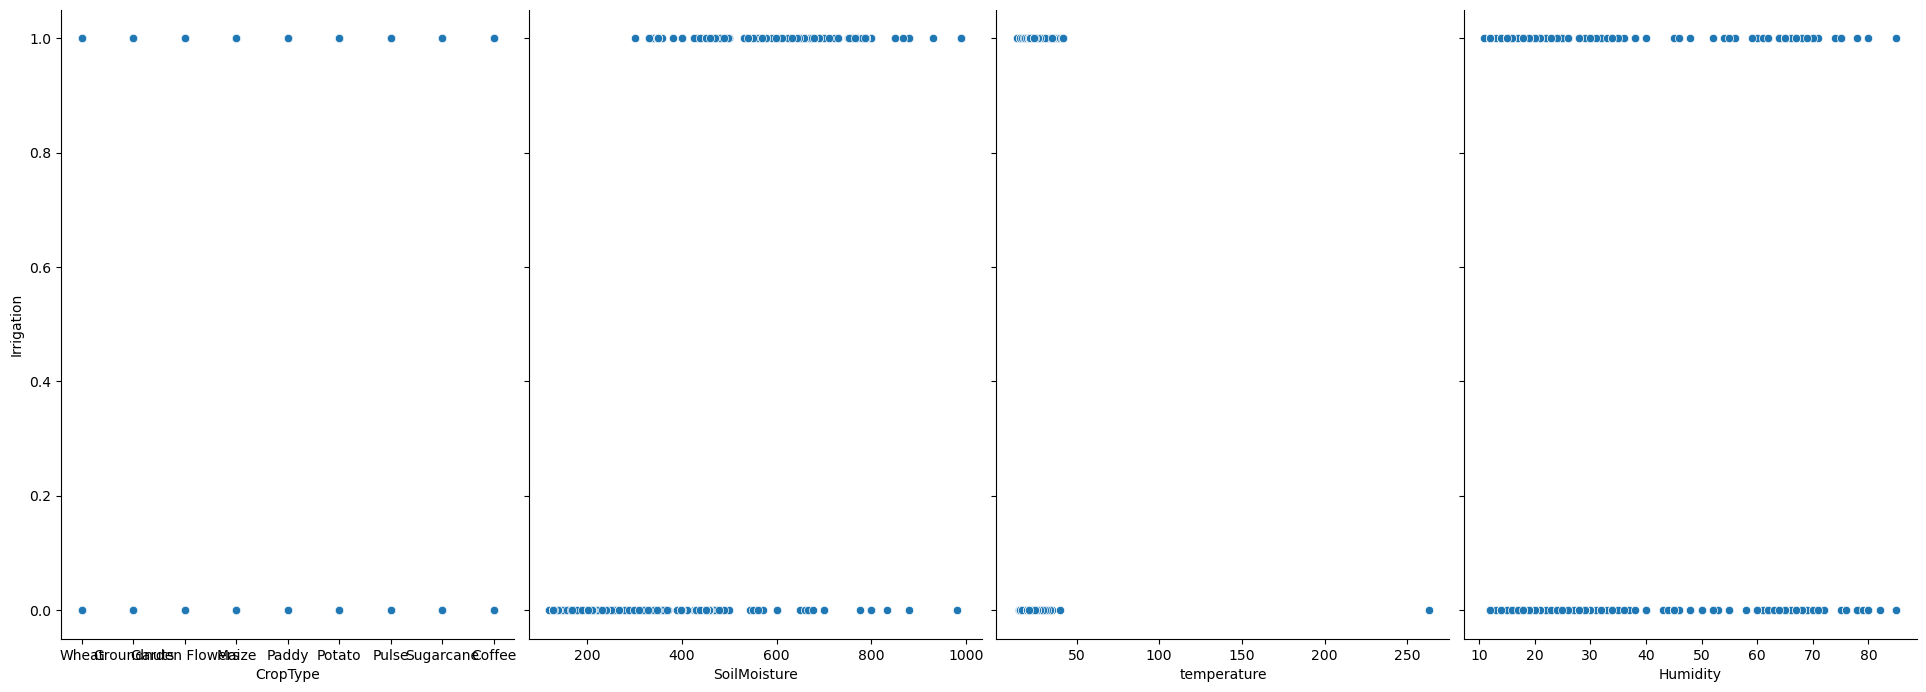

In [15]:
sns.pairplot(dataset,x_vars=['CropType','SoilMoisture','temperature','Humidity'],y_vars='Irrigation',height=7,aspect=0.7)

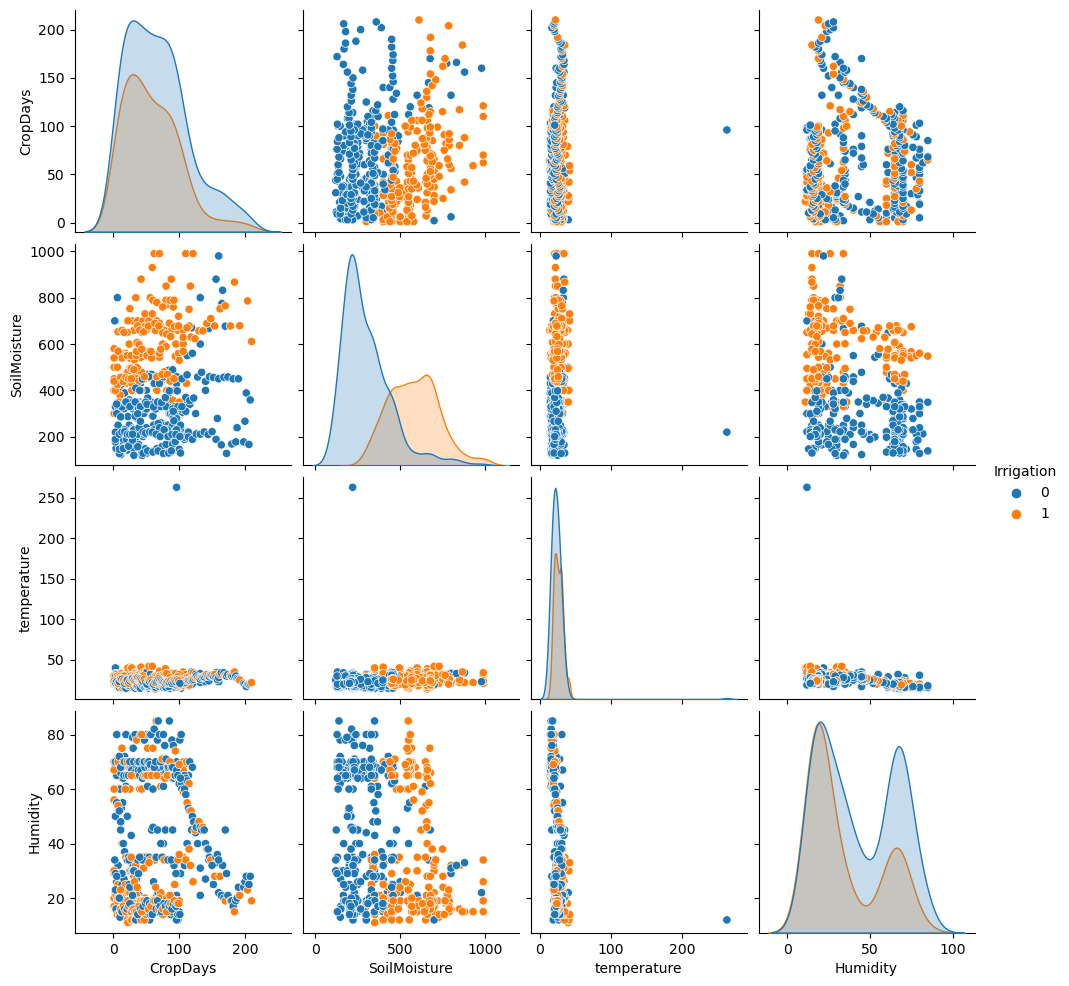

In [16]:
sns.pairplot(dataset, hue ='Irrigation')
plt.show()

In [17]:
sns.heatmap(dataset.corr(),annot=True)

ValueError: could not convert string to float: 'Wheat'

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((375, 5), (375,), (126, 5), (126,))

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [20]:
ss = MinMaxScaler()

In [21]:
ss.fit(X_train)

MinMaxScaler()

In [22]:
X_train_scaled = ss.transform(X_train)

In [23]:
X_test_scaled = ss.transform(X_test)

In [24]:
X_train_scaled
X_test_scaled

array([[0.125     , 0.38755981, 0.01606426, 0.74324324, 0.11494253],
       [1.        , 0.38755981, 0.02811245, 0.08108108, 0.09195402],
       [0.        , 0.18181818, 0.05220884, 0.08108108, 0.54942529],
       [0.375     , 0.25358852, 0.04417671, 0.32432432, 0.12068966],
       [0.375     , 0.41626794, 0.07630522, 0.12162162, 0.36781609],
       [0.75      , 0.10047847, 0.04417671, 0.10810811, 0.66666667],
       [1.        , 0.23444976, 0.02008032, 0.01351351, 0.32183908],
       [0.        , 0.46889952, 0.04016064, 0.09459459, 0.64137931],
       [0.375     , 0.1291866 , 0.06425703, 0.17567568, 0.35632184],
       [1.        , 0.25837321, 0.02008032, 0.01351351, 0.66666667],
       [0.        , 0.20095694, 0.04417671, 0.05405405, 0.52643678],
       [0.5       , 0.15311005, 0.08032129, 0.01351351, 0.49885057],
       [0.5       , 0.26315789, 0.07228916, 0.04054054, 0.12643678],
       [1.        , 0.46889952, 0.0562249 , 0.10810811, 0.68965517],
       [0.125     , 0.51196172, 0.

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model_DT = DecisionTreeClassifier()

In [27]:
model_DT.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [28]:
Y_predict = model_DT.predict(X_test_scaled)

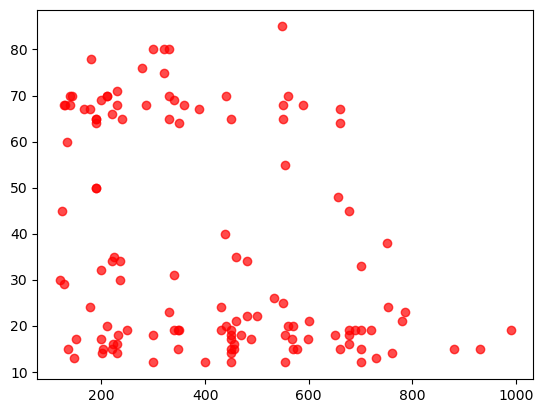

In [29]:
plt.scatter(X_test[Y_test == 0]['SoilMoisture'],X_test[Y_test == 0]['Humidity'], c = 'red', alpha = 0.7)
plt.scatter(X_test[Y_test == 1]['SoilMoisture'],X_test[Y_test == 1]['Humidity'], c = 'red', alpha = 0.7)

In [30]:
model_DT.score(X_test_scaled,Y_test)

0.9523809523809523

In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        76
           1       0.94      0.94      0.94        50

    accuracy                           0.95       126
   macro avg       0.95      0.95      0.95       126
weighted avg       0.95      0.95      0.95       126



In [32]:
import gradio as gr
from theme_dropdown import create_theme_dropdown
import joblib
import numpy as np

dropdown, js = create_theme_dropdown()

def predict_irrigation(CropType, CropDays, temperature, Humidity, SoilMoisture):
    Irrigation = model_DT.predict([[CropType, CropDays, temperature, Humidity, SoilMoisture]])
    if Irrigation == 1:
        return "yes"
    return "no"

crop_block = gr.inputs.Textbox(label="Crop Type", type="text")
days_block = gr.inputs.Textbox(label="Crop Days", type="text")
temp_block = gr.inputs.Textbox(label="Temperature", type="text")
humidity_block = gr.inputs.Textbox(label="Humidity", type="text")
soil_block = gr.inputs.Textbox(label="Soil Moisture", type="text")

irrigation_block = gr.outputs.Textbox(label="Irrigation")

interface = gr.Interface(fn=predict_irrigation, 
                         inputs=[crop_block, days_block, temp_block, humidity_block, soil_block], 
                         outputs=irrigation_block, 
                         title="Smart Irrigation System", 
                         examples = [[0,99,24,18,678],[8,10,30,15,400],[0,93,25,19,675]],
                         description="Predict the irrigation required for a crop based on its type, days since planting, temperature, humidity, and soil moisture.",
                        theme='abidlabs/dracula_test')

# Launch the interface
interface.launch(share = True)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://676e9e8881f4889bd3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
